In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]

sns.set_palette(five_thirty_eight)
sns.set_context("talk")

In [4]:
# df_data = pd.read_csv("data/2019_nCoV_data.csv")
df_data = pd.read_csv("../data/covid_19_data.csv")
df_data = df_data.rename(columns={"Country/Region": "Country", "ObservationDate":"Date"})
df_data["Date"] = pd.to_datetime(df_data["Date"])

In [5]:
df_data[df_data["Country"] == "Mainland China"]

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5712,5713,2020-03-15,Xinjiang,Mainland China,2020-03-11T02:18:14,76.0,3.0,73.0
5713,5714,2020-03-15,Inner Mongolia,Mainland China,2020-03-11T03:53:03,75.0,1.0,71.0
5714,5715,2020-03-15,Ningxia,Mainland China,2020-03-14T09:53:08,75.0,0.0,73.0
5773,5774,2020-03-15,Qinghai,Mainland China,2020-03-11T02:18:14,18.0,0.0,18.0


In [9]:
importantes = ["Colombia", "Italy", "Spain", "France", "Japan", "Germany", "US", "South Korea"]

In [10]:
df_prin = df_data[df_data["Country"].isin(importantes)]
df_prin = df_prin[df_prin["Confirmed"] > 0]
df_prin['start_date'] = df_prin.groupby('Country')['Date'].transform('min')
df_prin["days_since_start"] = (df_prin["Date"] - df_prin['start_date']).dt.days

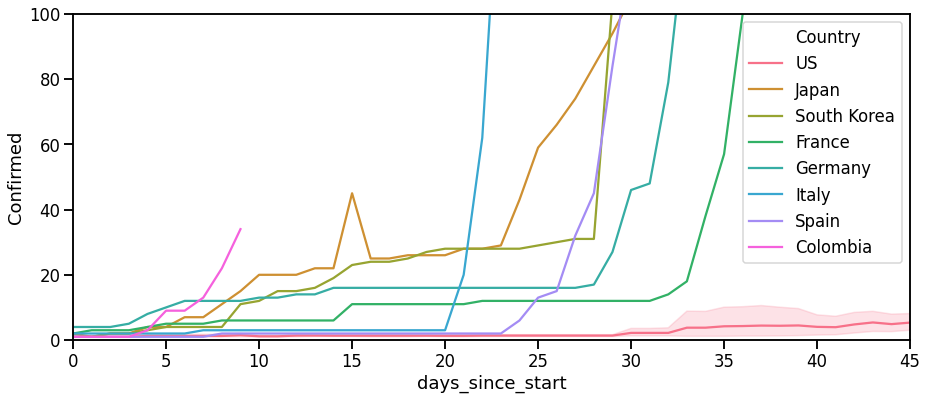

In [23]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(x="days_since_start", y="Confirmed", hue="Country", data=df_prin)
axes = ax.axes
axes.set_ylim(0,100)
axes.set_xlim(0,45)
plt.show()

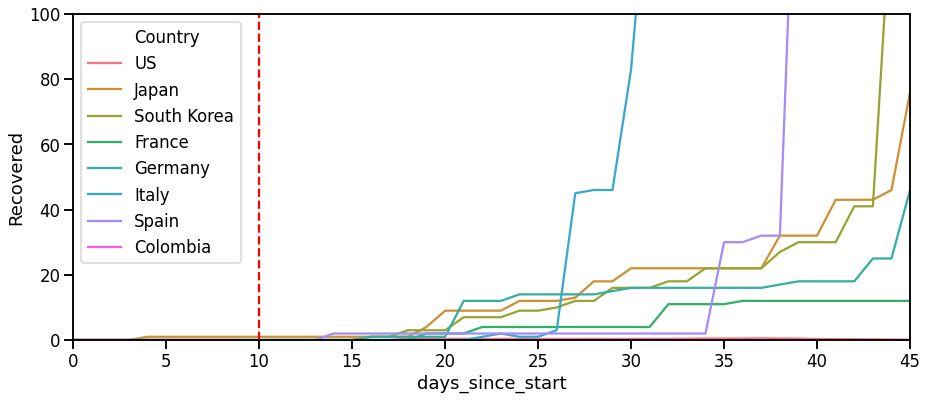

In [24]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(x="days_since_start", y="Recovered", hue="Country", data=df_prin)
plt.axvline(10, 0,1400, color="r", linestyle='--')
axes = ax.axes
axes.set_ylim(0,100)
axes.set_xlim(0,45)
plt.show()

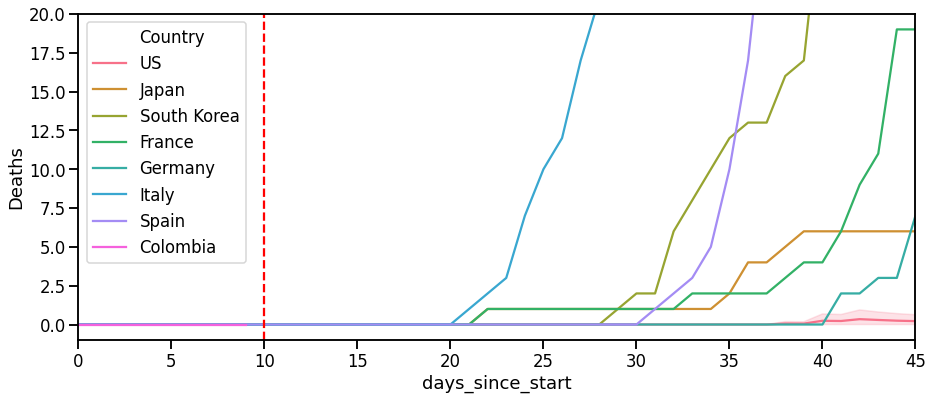

In [22]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(x="days_since_start", y="Deaths", hue="Country", data=df_prin)
plt.axvline(10, 0,1400, color="r", linestyle='--')
axes = ax.axes
axes.set_ylim(-1,20)
axes.set_xlim(0,45)
plt.show()